In [1]:
import tensorflow as tf
from tensorflow import keras 
from keras.models import load_model
from tensorflow_models import nlp

C:\Users\fahee\Anaconda3\envs\Tensor3\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
C:\Users\fahee\Anaconda3\envs\Tensor3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os
import matplotlib.pyplot as plt
#from wordcloud import WordCloud

In [3]:
#pip install wordcloud

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import nltk
#import re
#from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize
#from nltk.stem import SnowballStemmer
#from nltk.stem import WordNetLemmatizer
from tensorflow_models import nlp
from official.nlp import optimization
import warnings

warnings.filterwarnings("ignore")

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GroupKFold
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import tensorflow.keras.backend as K
from scipy.stats import spearmanr
from math import floor, ceil
from transformers import *

np.set_printoptions(suppress=True)
print(tf.__version__)

import shutil

from official.nlp import optimization  # to create AdamW optmizer

tf.get_logger().setLevel('ERROR')

2.10.0


In [6]:
from tensorflow.python.keras.utils import tf_utils

In [7]:
import urduhack
#urduhack.download()
from urduhack.normalization import normalize
from urduhack.preprocessing import normalize_whitespace, remove_punctuation, remove_accents, replace_urls, replace_emails, replace_numbers, replace_currency_symbols, remove_english_alphabets

In [8]:
df = pd.read_csv('Urdu-Abusive-set.csv')

In [9]:
df

,class,comment_text
0,1,کہ کے لے لی شام دلے کی
1,1,"اب اگر اس ,نے کچھ avجواب دیا تو اس کی گانڈ مار..."
2,1,اب ان چوتیوں نے وہ جو کنسرٹ ہو رہا تھا وہ بھی ...
3,1,اب ان کی گانڈ میں ہاتھ ڈال کر انتڑیاں نکالے گا...
4,0,اب تک سکی سب سے اچھی ویڈیو ہے
...,...,...
2166,0,یہی آخری ویڈیو ہے
2167,1,یوٹیوب ایکس میں جا کر ماں چدوا
2168,0,یوٹیوب کے دوسرے ویڈیوز کو بھی آپ دیکھو زیادہ م...
2169,0,یوٹیوبر ہا ہا ہا


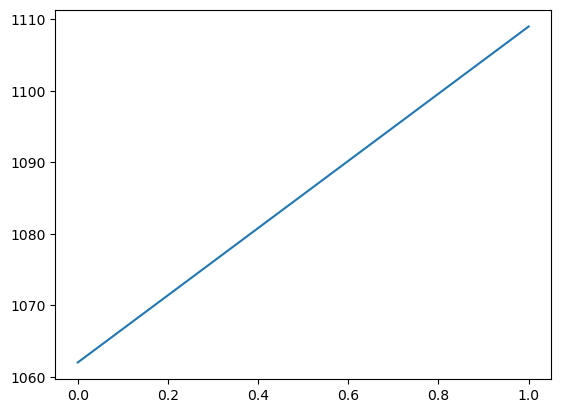

In [10]:
plt.plot(df['class'].value_counts())

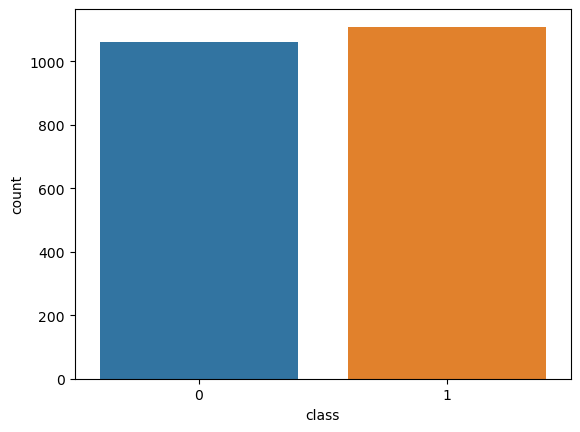

In [11]:
sns.countplot( x = 'class', data = df );

In [12]:
df['comment_text'] = df['comment_text'].apply(normalize) # To normalize some text, all you need to do pass unicode text. It will return a str with normalized characters both single and combined, proper spaces after digits and punctuations and diacritics(Zabar - Paish) removed.
df['comment_text'] = df['comment_text'].apply(remove_punctuation) # Remove punctuation from text by removing all instances of marks. marks=',;:'
df['comment_text'] = df['comment_text'].apply(remove_accents) # Remove accents from any accented unicode characters in text str, either by transforming them into ascii equivalents or removing them entirely.
df['comment_text'] = df['comment_text'].apply(replace_urls) # Replace all URLs in text str with replace_with str.
df['comment_text'] = df['comment_text'].apply(replace_emails) # Replace all emails in text str with replace_with str.df['comment_text'] = df['comment_text'].apply(replace_numbers) # Replace all numbers in text str with replace_with str.
df['comment_text'] = df['comment_text'].apply(replace_currency_symbols) # Replace all currency symbols in text str with string specified by replace_with str.
df['comment_text'] = df['comment_text'].apply(remove_english_alphabets) # Removes English words and digits from a text
df['comment_text'] = df['comment_text'].apply(normalize_whitespace) ## Given text str, replace one or more spacings with a single space, and one or more linebreaks with a single newline. Also strip leading/trailing whitespace.

In [13]:
from typing import FrozenSet

# Urdu Language Stop words list
STOP_WORDS: FrozenSet[str] = frozenset("""
 آ آئی آئیں آئے آتا آتی آتے آس آمدید آنا آنسہ آنی آنے آپ آگے آہ آہا آیا اب ابھی ابے
 ارے اس اسکا اسکی اسکے اسی اسے اف افوہ البتہ الف ان اندر انکا انکی انکے انہوں انہی انہیں اوئے اور اوپر
 اوہو اپ اپنا اپنوں اپنی اپنے اپنےآپ اکثر اگر اگرچہ اہاہا ایسا ایسی ایسے ایک بائیں بار بارے بالکل باوجود باہر
 بج بجے بخیر بشرطیکہ بعد بعض بغیر بلکہ بن بنا بناؤ بند بڑی بھر بھریں بھی بہت بہتر تاکہ تاہم تب تجھ
 تجھی تجھے ترا تری تلک تم تمام تمہارا تمہاروں تمہاری تمہارے تمہیں تو تک تھا تھی تھیں تھے تیرا تیری تیرے
 جا جاؤ جائیں جائے جاتا جاتی جاتے جانی جانے جب جبکہ جدھر جس جسے جن جناب جنہوں جنہیں جو جہاں جی جیسا
 جیسوں جیسی جیسے حالانکہ حالاں حصہ حضرت خاطر خالی خواہ خوب خود دائیں درمیان دریں دو دوران دوسرا دوسروں دوسری دوں
 دکھائیں دی دیئے دیا دیتا دیتی دیتے دیر دینا دینی دینے دیکھو دیں دیے دے ذریعے رکھا رکھتا رکھتی رکھتے رکھنا رکھنی
 رکھنے رکھو رکھی رکھے رہ رہا رہتا رہتی رہتے رہنا رہنی رہنے رہو رہی رہیں رہے ساتھ سامنے ساڑھے سب سبھی
 سراسر سمیت سوا سوائے سکا سکتا سکتے سہ سہی سی سے شاید شکریہ صاحب صاحبہ صرف ضرور طرح طرف طور علاوہ عین
 فقط فلاں فی قبل قطا لئے لائی لائے لاتا لاتی لاتے لانا لانی لانے لایا لو لوجی لوگوں لگ لگا لگتا
 لگتی لگی لگیں لگے لہذا لی لیا لیتا لیتی لیتے لیکن لیں لیے لے ماسوا مت مجھ مجھی مجھے محترم محترمہ محض
 مرا مرحبا مری مرے مزید مس مسز مسٹر مطابق مل مکرمی مگر مگھر مہربانی میرا میروں میری میرے میں نا نزدیک
 نما نہ نہیں نیز نیچے نے و وار واسطے واقعی والا والوں والی والے واہ وجہ ورنہ وغیرہ ولے وگرنہ وہ وہاں
 وہی وہیں ویسا ویسے ویں پاس پایا پر پس پلیز پون پونی پونے پھر پہ پہلا پہلی پہلے پیر پیچھے چاہئے
 چاہتے چاہیئے چاہے چلا چلو چلیں چلے چناچہ چند چونکہ چکی چکیں چکے ڈالنا ڈالنی ڈالنے ڈالے کئے کا کاش کب کبھی
 کدھر کر کرتا کرتی کرتے کرم کرنا کرنے کرو کریں کرے کس کسی کسے کم کن کنہیں کو کوئی کون کونسا
 کونسے کچھ کہ کہا کہاں کہہ کہی کہیں کہے کی کیا کیسا کیسے کیونکر کیونکہ کیوں کیے کے گئی گئے گا گنا
 گو گویا گی گیا ہائیں ہائے ہاں ہر ہرچند ہرگز ہم ہمارا ہماری ہمارے ہمی ہمیں ہو ہوئی ہوئیں ہوئے ہوا
 ہوبہو ہوتا ہوتی ہوتیں ہوتے ہونا ہونگے ہونی ہونے ہوں ہی ہیلو ہیں ہے یا یات یعنی یک یہ یہاں یہی یہیں
""".split())


def remove_stopwords(text: str):
    return " ".join(word for word in text.split() if word not in STOP_WORDS)


In [14]:
df[['comment_text']].head(10)

,comment_text
0,کہ کے لے لی شام دلے کی
1,اب اگر اس نے کچھ جواب دیا تو اس کی گانڈ مار دی...
2,اب ان چوتیوں نے وہ جو کنسرٹ ہو رہا تھا وہ بھی ...
3,اب ان کی گانڈ میں ہاتھ ڈال کر انتڑیاں نکالے گا...
4,اب تک سکی سب سے اچھی ویڈیو ہے
5,اب تک کا سب سے برا مزاق
6,اب تو اتنی مار دی تیری بھائی نے کہ اب تو شادی ...
7,اب لوڑا آگیا ہے یا للی کا ٹوپا
8,اب وہ اپنی گانڈ کا زور لگائے گا اس ویڈیو کو بن...
9,اب وہ چوتیا کو دکی بھائی بین کر دے گا


In [15]:
df

,class,comment_text
0,1,کہ کے لے لی شام دلے کی
1,1,اب اگر اس نے کچھ جواب دیا تو اس کی گانڈ مار دی...
2,1,اب ان چوتیوں نے وہ جو کنسرٹ ہو رہا تھا وہ بھی ...
3,1,اب ان کی گانڈ میں ہاتھ ڈال کر انتڑیاں نکالے گا...
4,0,اب تک سکی سب سے اچھی ویڈیو ہے
...,...,...
2166,0,یہی آخری ویڈیو ہے
2167,1,یوٹیوب ایکس میں جا کر ماں چدوا
2168,0,یوٹیوب کے دوسرے ویڈیوز کو بھی آپ دیکھو زیادہ م...
2169,0,یوٹیوبر ہا ہا ہا


In [16]:
c=df['class']
df.rename(columns={'comment_text' : 'text',
                   'class' : 'category'}, 
                    inplace=True)
a=df['text']
b=df['category'].map({0: 'False', 1: 'True'})

df= pd.concat([a,b,c], axis=1)
df.rename(columns={'class' : 'label'}, 
                    inplace=True)
df

,text,category,label
0,کہ کے لے لی شام دلے کی,True,1
1,اب اگر اس نے کچھ جواب دیا تو اس کی گانڈ مار دی...,True,1
2,اب ان چوتیوں نے وہ جو کنسرٹ ہو رہا تھا وہ بھی ...,True,1
3,اب ان کی گانڈ میں ہاتھ ڈال کر انتڑیاں نکالے گا...,True,1
4,اب تک سکی سب سے اچھی ویڈیو ہے,False,0
...,...,...,...
2166,یہی آخری ویڈیو ہے,False,0
2167,یوٹیوب ایکس میں جا کر ماں چدوا,True,1
2168,یوٹیوب کے دوسرے ویڈیوز کو بھی آپ دیکھو زیادہ م...,False,0
2169,یوٹیوبر ہا ہا ہا,False,0


In [17]:
df.groupby('label').count()

,text,category
label,,
0,1062,1062
1,1109,1109


In [18]:
false, true = np.bincount(df['label'])
total = false + true
print('Examples:\n    Total: {}\n    hate: {} ({:.2f}% of total)\n'.format(
    total, false, 100 * false / total))
print('Examples:\n    Total: {}\n    Ofensive: {} ({:.2f}% of total)\n'.format(
    total, true, 100 * true / total))


Examples:
    Total: 2171
    hate: 1062 (48.92% of total)

Examples:
    Total: 2171
    Ofensive: 1109 (51.08% of total)



In [19]:
X_train_, X_test, y_train_, y_test = train_test_split(
    df.index.values,
    df.label.values,
    test_size=0.20,
    random_state=42,
    stratify=df.label.values,    
)

In [20]:
X_train, X_val, y_train, y_val = train_test_split(
    df.loc[X_train_].index.values,
    df.loc[X_train_].label.values,
    test_size=0.20,
    random_state=42,
    stratify=df.loc[X_train_].label.values,  
)

In [21]:
df['data_type'] = ['not_set']*df.shape[0]
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'
df.loc[X_test, 'data_type'] = 'test'

In [22]:
df.groupby(['category', 'label', 'data_type']).count()

text
category label data_type      
False    0     test        213
               train       679
               val         170
True     1     test        222
               train       709
               val         178

In [23]:
df

,text,category,label,data_type
0,کہ کے لے لی شام دلے کی,True,1,train
1,اب اگر اس نے کچھ جواب دیا تو اس کی گانڈ مار دی...,True,1,val
2,اب ان چوتیوں نے وہ جو کنسرٹ ہو رہا تھا وہ بھی ...,True,1,val
3,اب ان کی گانڈ میں ہاتھ ڈال کر انتڑیاں نکالے گا...,True,1,train
4,اب تک سکی سب سے اچھی ویڈیو ہے,False,0,train
...,...,...,...,...
2166,یہی آخری ویڈیو ہے,False,0,train
2167,یوٹیوب ایکس میں جا کر ماں چدوا,True,1,val
2168,یوٹیوب کے دوسرے ویڈیوز کو بھی آپ دیکھو زیادہ م...,False,0,val
2169,یوٹیوبر ہا ہا ہا,False,0,train


In [24]:
df_train = df.loc[df["data_type"]=="train"]
df_train.head(5)

,text,category,label,data_type
0,کہ کے لے لی شام دلے کی,True,1,train
3,اب ان کی گانڈ میں ہاتھ ڈال کر انتڑیاں نکالے گا...,True,1,train
4,اب تک سکی سب سے اچھی ویڈیو ہے,False,0,train
6,اب تو اتنی مار دی تیری بھائی نے کہ اب تو شادی ...,True,1,train
11,ابلیس اوئے دلے نازک صورتحال فر ابیلس دلے,True,1,train


In [25]:
df_val = df.loc[df["data_type"]=="val"]
df_val.head(5)

,text,category,label,data_type
1,اب اگر اس نے کچھ جواب دیا تو اس کی گانڈ مار دی...,True,1,val
2,اب ان چوتیوں نے وہ جو کنسرٹ ہو رہا تھا وہ بھی ...,True,1,val
7,اب لوڑا آگیا ہے یا للی کا ٹوپا,True,1,val
10,ابرار یہ سب ہندو کلچر میں نہیں ہے یہ سب بکواس ...,False,0,val
17,ابھی آپ نے یہ چوتیاپا تو کر لیا ویڈیو بنا کراو...,True,1,val


In [26]:
df_test = df.loc[df["data_type"]=="test"]
df_test.head(5)

,text,category,label,data_type
5,اب تک کا سب سے برا مزاق,False,0,test
8,اب وہ اپنی گانڈ کا زور لگائے گا اس ویڈیو کو بن...,True,1,test
9,اب وہ چوتیا کو دکی بھائی بین کر دے گا,True,1,test
14,ابلیس کینیڈا میں جا کر اپنی اوقات بھول گیا ہے ...,True,1,test
18,ابھی بھڑوے کے بچے تیل کی بوتل دے تو اپنی ماں ک...,True,1,test


In [27]:
df.dtypes

text         object
category     object
label         int64
data_type    object
dtype: object

In [ ]:
#from wordcloud import WordCloud, STOPWORDS
#stopwords = set(STOPWORDS)
#stopwords.add("RT")

#print(type(STOPWORDS))

#import random

#def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
 #   h = 344
  #  s = int(100.0 * 255.0 / 255.0)
   # l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)
    #return "hsl({}, {}%, {}%)".format(h, s, l)

#wordcloud = WordCloud(
 #                         background_color='white',
  #                        stopwords=stopwords,
   #                       max_words=200,
    #                      max_font_size=60, 
     #                     random_state=42
      #                   ).generate(str(df.loc[df["category"]=="True"].text))
#print(wordcloud)
#fig = plt.figure(1)
#plt.imshow(wordcloud.recolor(color_func= random_color_func, random_state=3),
 #          interpolation="bilinear")
#plt.axis('off')
#plt.show()

In [28]:
train_ds = tf.data.Dataset.from_tensor_slices((df_train.text.values, df_train.label.values))
val_ds = tf.data.Dataset.from_tensor_slices((df_val.text.values, df_val.label.values))
test_ds = tf.data.Dataset.from_tensor_slices((df_test.text.values, df_test.label.values))


In [29]:
train_ds

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [30]:
train_ds = train_ds.shuffle(len(df_train)).batch(32, drop_remainder=False)
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [31]:
val_ds = val_ds.shuffle(len(df_val)).batch(32, drop_remainder=False)
val_ds

<BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [32]:
test_ds = test_ds.shuffle(len(df_test)).batch(32, drop_remainder=False)
test_ds

<BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [33]:

#tfhub_handle_encoder = map_name_to_handle[bert_model_name]
#tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]
tfhub_handle_encoder = 'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/4'
tfhub_handle_preprocess = 'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3'
print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/4
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3


In [34]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [35]:
for text_batch, label_batch in train_ds.take(1):
  for i in range(1):
    tweet = text_batch.numpy()[i]
    print(f'Tweet: {text_batch.numpy()[i]}')
    label = label_batch.numpy()[i]
    print(f'Label : {label}')

text_test = ['اب وہ اپنی گانڈ کا زور لگائے گا  اس ویڈیو کو بند کروانےمیں']
text_test = [tweet]


text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Tweet: b'\xd8\xa7\xd9\x88\xd8\xa6\xdb\x92 \xdb\x8c\xd8\xa7\xd8\xb1 \xd8\xaf\xda\xa9\xdb\x8c \xd8\xaa\xd9\x88 \xda\xa9\xd8\xb3 \xda\x86\xd9\x88\xd8\xaa\xdb\x8c\xd8\xa7\xd9\xbe\xd8\xa7 \xd9\x85\xdb\x8c\xda\xba \xd9\xbe\xda\x91 \xda\xaf\xdb\x8c\xd8\xa7 \xdb\x81\xdb\x92 \xd8\xa8\xdb\x81\xd8\xaa \xd8\xa8\xd9\x88\xd8\xb1\xd9\x86\xda\xaf \xd9\x88\xdb\x8c\xda\x88\xdb\x8c\xd9\x88 \xdb\x81\xdb\x92 \xdb\x8c\xd8\xa7\xd8\xb1'
Label : 1
Keys       : ['input_word_ids', 'input_type_ids', 'input_mask']
Shape      : (1, 128)
Word Ids   : [  101 12084 26649 12218 10673   771 18716 23458   823 11091   818 24436]
Input Mask : [1 1 1 1 1 1 1 1 1 1 1 1]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [36]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [37]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/4
Pooled Outputs Shape:(1, 768)
Pooled Outputs Values:[ 0.18554294 -0.0644961   0.168191   -0.2588207  -0.03221239  0.21284114
  0.09976011  0.15485395 -0.24059719  0.1328809  -0.08814707 -0.14447646]
Sequence Outputs Shape:(1, 128, 768)
Sequence Outputs Values:[[-0.05573388 -0.0907823   0.07886712 ...  0.1725252  -0.02567395
  -0.13263784]
 [-0.04008029 -0.81712055  0.42798418 ...  0.1107686  -0.07441887
  -0.38909128]
 [-0.14541805 -0.6827471   0.2963515  ...  0.08444104 -0.16881184
  -0.17741022]
 ...
 [ 0.08999019 -0.28953302  0.73280406 ...  0.5510432  -0.10342277
   0.01702813]
 [-0.46653405  0.1316621   1.1010526  ...  0.3205923   0.31096265
  -0.33527482]
 [ 0.01128221 -0.2084643   1.1204119  ...  0.35405862  0.18761446
   0.37336782]]


In [38]:
weight_for_0 = (1 / false)*(total)/3.0 
weight_for_1 = (1 / true)*(total)/3.0
#weight_for_2 = (1 / neither)*(total)/3.0


class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))
#print('Weight for class 2: {:.2f}'.format(weight_for_2))

Weight for class 0: 0.68
Weight for class 1: 0.65


In [39]:
initial_output_bias = np.array([3.938462, 15, 5.])
initial_output_bias 

array([ 3.938462, 15.      ,  5.      ])

# Bert + MLP

In [85]:
def build_classifier_model(output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
        #print(output_bias)
        
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    net = outputs['pooled_output']
    net = tf.keras.layers.Dense(512, activation="relu")(net)
    net = tf.keras.layers.Dropout(0.2)(net)
#   net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
    net = tf.keras.layers.Dense(3, activation="softmax", name='classifier', bias_initializer=output_bias)(net)
    
    return tf.keras.Model(text_input, net)

In [86]:
classifier_model = build_classifier_model(output_bias=initial_output_bias)
bert_raw_result = classifier_model(tf.constant(text_test))
print(tf.sigmoid(bert_raw_result))

tf.Tensor([[0.5000057  0.7310448  0.50001174]], shape=(1, 3), dtype=float32)


In [87]:
classifier_model.get_weights()[-1]

array([ 3.938462, 15.      ,  5.      ], dtype=float32)

In [88]:
classifier_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                    

In [89]:
tf.keras.utils.plot_model(classifier_model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [90]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

In [91]:
epochs = 20
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [92]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [94]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=train_ds,
                               validation_data=val_ds,
                               epochs=epochs,
                               # The class weights go here
                               class_weight=class_weight
)

Training model with https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/4
Epoch 1/20
44/44 [==============================] - 1677s 38s/step - loss: 0.0809 - accuracy: 0.9712 - val_loss: 0.1453 - val_accuracy: 0.9454
Epoch 2/20
44/44 [==============================] - 1705s 39s/step - loss: 0.0460 - accuracy: 0.9827 - val_loss: 0.2845 - val_accuracy: 0.9282
Epoch 3/20
44/44 [==============================] - 1667s 38s/step - loss: 0.0335 - accuracy: 0.9878 - val_loss: 0.1938 - val_accuracy: 0.9684
Epoch 4/20
44/44 [==============================] - 1710s 39s/step - loss: 0.0153 - accuracy: 0.9957 - val_loss: 0.1708 - val_accuracy: 0.9598
Epoch 5/20
44/44 [==============================] - 1583s 36s/step - loss: 0.0135 - accuracy: 0.9957 - val_loss: 0.1740 - val_accuracy: 0.9655
Epoch 6/20
44/44 [==============================] - 1569s 36s/step - loss: 0.0074 - accuracy: 0.9986 - val_loss: 0.2162 - val_accuracy: 0.9684
Epoch 7/20
44/44 [==============================] - 1568s 

In [95]:
loss, accuracy = classifier_model.evaluate(test_ds)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

14/14 [==============================] - 163s 12s/step - loss: 0.2497 - accuracy: 0.9701
Loss: 0.2497180700302124
Accuracy: 0.9701149463653564


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


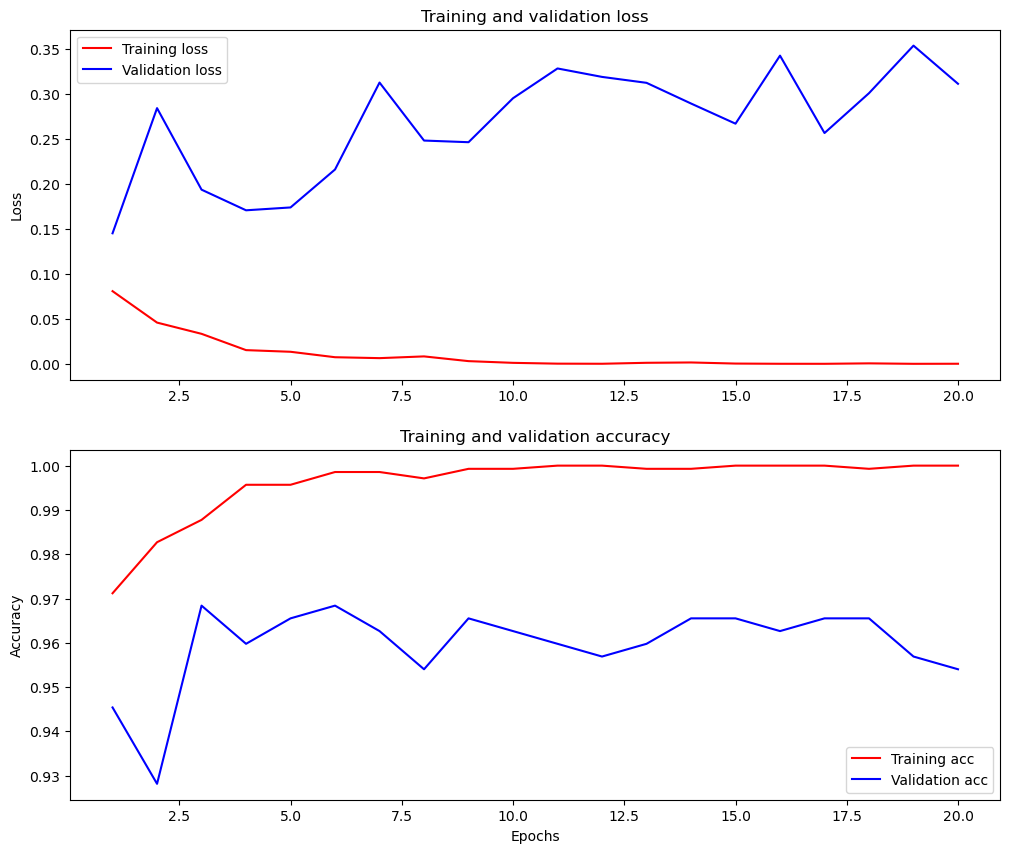

In [96]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
# acc = history_dict['binary_accuracy']
# val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(12, 10))
fig.tight_layout()

plt.subplot(2, 1, 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [97]:
dataset_name = 'BERT-with-MLP-20---epochs-new-hard'
saved_model_path = './{}_bert'.format(dataset_name.replace('/', '_'))

classifier_model.save(saved_model_path, include_optimizer=False)

In [98]:
result =  classifier_model.predict(test_ds)
print(result.shape)

14/14 [==============================] - 171s 12s/step
(435, 3)


In [99]:
result[0:2]

array([[0.00744113, 0.99236274, 0.00019618],
       [0.9998259 , 0.00016967, 0.00000443]], dtype=float32)

In [100]:
classes = np.argmax(result, axis=-1)

In [101]:
tweet = []
test_labels = []
predictions = []
for tweet, labels in test_ds.take(-1):
  tweet = tweet.numpy()
  test_labels.append(labels.numpy())
  predictions.append(classifier_model.predict(tweet))

1/1 [==============================] - 9s 9s/step


In [102]:
test_labels[0:2]

[array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 0, 1, 0, 0, 0], dtype=int64),
 array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
        0, 1, 1, 0, 1, 0, 0, 1, 0, 0], dtype=int64)]

In [103]:
predictions[0:2]

[array([[0.00001152, 0.99996746, 0.00002102],
        [0.00001126, 0.99996865, 0.00002012],
        [0.00001607, 0.9999604 , 0.00002344],
        [0.0077691 , 0.992058  , 0.00017288],
        [0.0000568 , 0.999908  , 0.00003529],
        [0.0000117 , 0.9999652 , 0.00002316],
        [0.00001511, 0.999962  , 0.0000229 ],
        [0.0000154 , 0.99995995, 0.00002462],
        [0.00001183, 0.9999652 , 0.000023  ],
        [0.99979645, 0.00019834, 0.00000519],
        [0.9996166 , 0.00037675, 0.00000651],
        [0.00001074, 0.9999647 , 0.00002453],
        [0.00001305, 0.9999621 , 0.00002494],
        [0.0000138 , 0.9999658 , 0.00002034],
        [0.99984276, 0.00015295, 0.00000431],
        [0.00000743, 0.99997675, 0.00001583],
        [0.9998204 , 0.00017511, 0.00000451],
        [0.9998098 , 0.00018619, 0.00000411],
        [0.99979097, 0.00020335, 0.00000572],
        [0.00001095, 0.9999691 , 0.00001993],
        [0.99976367, 0.00023074, 0.00000558],
        [0.9998288 , 0.00016648, 0

In [104]:
from itertools import chain
flatten_list = list(chain.from_iterable(predictions))
y_pred = np.argmax(flatten_list, axis=-1)

In [105]:
y_test = np.array(list(chain.from_iterable(test_labels)))

# Matrix 

In [106]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[205,   8],
       [  6, 216]], dtype=int64)

In [107]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report
#from sklearn.metrics import accuracy_score

In [108]:
print('Precision: %.4f' % precision_score(y_test, y_pred))

Precision: 0.9643


In [109]:
print('Recall: %.4f' % recall_score(y_test, y_pred))

Recall: 0.9730


In [110]:
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

Accuracy: 0.9678


In [111]:
print('F1 Score: %.4f' % f1_score(y_test, y_pred))

F1 Score: 0.9686


In [67]:
print('Precision: %.4f' % precision_score(y_test, y_pred, average = "macro"))

Precision: 0.9678


In [68]:
print('Recall: %.4f' % recall_score(y_test, y_pred, average = "macro"))

Recall: 0.9679


In [69]:
print('F1 Score: %.4f' % f1_score(y_test, y_pred, average = "macro"))

F1 Score: 0.9678


In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       213
           1       0.97      0.96      0.97       222

    accuracy                           0.97       435
   macro avg       0.97      0.97      0.97       435
weighted avg       0.97      0.97      0.97       435



In [104]:
#import pickle


In [106]:
#with open('y_test','wb') as f:
 #   pickle.dump(y_test,f)

In [107]:
#with open('y_test', 'r') as f:
 #   mp = pickle.load(f)

In [108]:
#mp.predict()

# BERT + CNN

In [129]:
def build_CNN_classifier_model():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    #net = outputs['pooled_output'] # [batch_size, 768].
    net = sequence_output = outputs["sequence_output"] # [batch_size, seq_length, 768]
      
    
    net = tf.keras.layers.Conv1D(32, (2), activation='relu')(net)
    #net = tf.keras.layers.MaxPooling1D(2)(net)
    
    net = tf.keras.layers.Conv1D(64, (2), activation='relu')(net)
    #net = tf.keras.layers.MaxPooling1D(2)(net)
    net = tf.keras.layers.GlobalMaxPool1D()(net)
    
#    net = tf.keras.layers.Flatten()(net)
    
    net = tf.keras.layers.Dense(512, activation="relu")(net)
    
    net = tf.keras.layers.Dropout(0.1)(net)
#   net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
    net = tf.keras.layers.Dense(3, activation="softmax", name='classifier')(net)
    
    return tf.keras.Model(text_input, net)

In [130]:
cnn_classifier_model = build_CNN_classifier_model()
bert_raw_result = cnn_classifier_model(tf.constant(text_test))
print(tf.sigmoid(bert_raw_result))

tf.Tensor([[0.58225894 0.57280314 0.592582  ]], shape=(1, 3), dtype=float32)


In [131]:
text_test

[b'\xd8\xa2\xd8\xae\xd8\xb1 \xd9\xbe\xd8\xb1 \xda\xa9\xd9\x88\xd9\x86 \xd8\xb3\xd8\xa7 \xda\xaf\xd8\xa7\xd9\x86\xd8\xa7 \xd8\xa7\xd8\xb3\xd8\xaa\xd8\xb9\xd9\x85\xd8\xa7\xd9\x84 \xdb\x81\xd9\x88\xd8\xa7 \xdb\x81\xdb\x92']

In [132]:
cnn_classifier_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                

In [133]:
tf.keras.utils.plot_model(cnn_classifier_model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [134]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [135]:
epochs = 40
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

cnn_classifier_model.compile(optimizer=optimizer,
                          loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                          metrics=tf.keras.metrics.SparseCategoricalAccuracy('accuracy'))

In [136]:
print(f'Training model with {tfhub_handle_encoder}')
cnn_history = cnn_classifier_model.fit(x=train_ds,
                                       validation_data=val_ds,
                                       epochs=epochs,
                                       class_weight=class_weight
                                      )

Training model with https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/4
Epoch 1/40
55/55 [==============================] - 2071s 36s/step - loss: 0.6495 - accuracy: 0.4582 - val_loss: 0.7312 - val_accuracy: 0.7347
Epoch 2/40
55/55 [==============================] - 2169s 40s/step - loss: 0.3049 - accuracy: 0.8230 - val_loss: 0.1742 - val_accuracy: 0.9541
Epoch 3/40
55/55 [==============================] - 2045s 37s/step - loss: 0.1085 - accuracy: 0.9528 - val_loss: 0.1445 - val_accuracy: 0.9541
Epoch 4/40
55/55 [==============================] - 1972s 36s/step - loss: 0.0769 - accuracy: 0.9681 - val_loss: 0.1624 - val_accuracy: 0.9490
Epoch 5/40
55/55 [==============================] - 2046s 37s/step - loss: 0.0588 - accuracy: 0.9789 - val_loss: 0.1259 - val_accuracy: 0.9745
Epoch 6/40
55/55 [==============================] - 2313s 42s/step - loss: 0.0464 - accuracy: 0.9852 - val_loss: 0.1539 - val_accuracy: 0.9694
Epoch 7/40
55/55 [==============================] - 2409s 

In [137]:
loss, accuracy = cnn_classifier_model.evaluate(test_ds)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

7/7 [==============================] - 79s 11s/step - loss: 0.4330 - accuracy: 0.9541
Loss: 0.43299028277397156
Accuracy: 0.9541284441947937


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


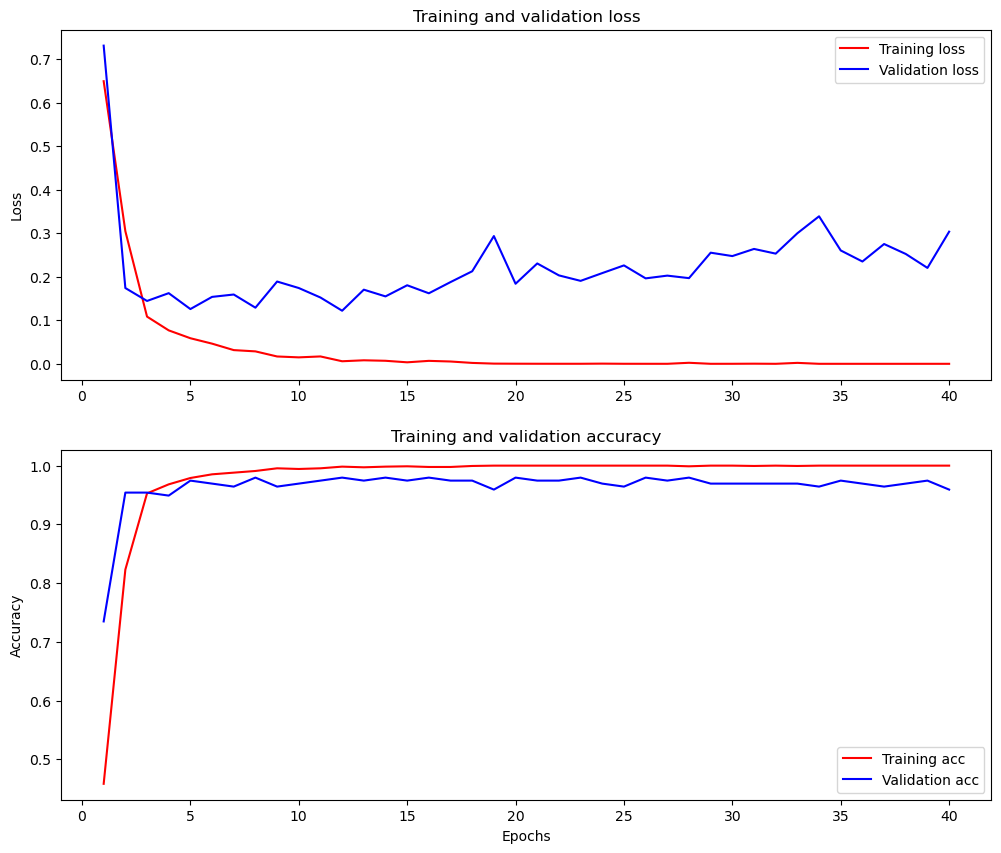

In [138]:
history_dict = cnn_history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
# acc = history_dict['binary_accuracy']
# val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(12, 10))
fig.tight_layout()

plt.subplot(2, 1, 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [139]:
dataset_name = 'BERT-CNN'
saved_model_path = './{}_bert'.format(dataset_name.replace('/', '_'))

cnn_classifier_model.save(saved_model_path, include_optimizer=False)

In [140]:
reloaded_model = tf.saved_model.load(saved_model_path)

In [141]:
result =  cnn_classifier_model.predict(test_ds)
print(result.shape)

7/7 [==============================] - 79s 11s/step
(218, 3)


In [142]:
result[0:2]

array([[0.00001561, 0.9999738 , 0.00001066],
       [0.00001408, 0.9999745 , 0.00001149]], dtype=float32)

In [143]:
classes = np.argmax(result, axis=-1)

In [144]:
tweet = []
test_labels = []
predictions = []
for tweet, labels in test_ds.take(-1):
  tweet = tweet.numpy()
  test_labels.append(labels.numpy())
  predictions.append(cnn_classifier_model.predict(tweet))

1/1 [==============================] - 11s 11s/step


In [145]:
test_labels[0:2]

[array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 0], dtype=int64),
 array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)]

In [146]:
predictions[0:2]

[array([[0.00001265, 0.9999778 , 0.00000955],
        [0.9999418 , 0.00005085, 0.00000722],
        [0.99994063, 0.00005149, 0.00000782],
        [0.00001523, 0.9999739 , 0.00001089],
        [0.00026182, 0.9997167 , 0.00002146],
        [0.00001292, 0.9999769 , 0.00001026],
        [0.9999373 , 0.00005531, 0.00000735],
        [0.99994564, 0.00004777, 0.00000651],
        [0.9999348 , 0.00005655, 0.00000865],
        [0.00001839, 0.99997354, 0.00000805],
        [0.9999379 , 0.00005477, 0.00000736],
        [0.00002907, 0.9999614 , 0.00000953],
        [0.99993455, 0.00005847, 0.00000698],
        [0.9999329 , 0.0000594 , 0.00000771],
        [0.00001757, 0.9999734 , 0.00000903],
        [0.9999361 , 0.0000558 , 0.00000812],
        [0.9999465 , 0.00004742, 0.00000604],
        [0.99994266, 0.00005064, 0.0000067 ],
        [0.00001549, 0.99997306, 0.00001146],
        [0.00001574, 0.9999722 , 0.00001201],
        [0.0000193 , 0.9999654 , 0.00001525],
        [0.00002885, 0.99996364, 0

In [147]:
flatten_list = list(chain.from_iterable(predictions))
y_pred = np.argmax(flatten_list, axis=-1)

In [148]:
type(y_pred)

numpy.ndarray

In [149]:
y_test = np.array(list(chain.from_iterable(test_labels)))

In [150]:
type(y_test)

numpy.ndarray

In [151]:
confusion_matrix(y_test, y_pred)

array([[103,   4],
       [  5, 106]], dtype=int64)

In [152]:
print('Precision: %.3f' % precision_score(y_test, y_pred))

TypeError: must be real number, not set

In [ ]:
print('Recall: %.3f' % recall_score(y_test, y_pred)*100)

In [ ]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred)*100)

In [ ]:
print('F1 Score: %.3f' % f1_score(y_test, y_pred))